In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data Exploration

In [4]:
def dataset_overview(df):
    print("\nDataset Information:")
    print(df.info())
    print("\nDescriptive Statistics:\n", df.describe())
    print("\nMissing Values in each column:\n", df.isnull().sum())
    print("\n Duplicated data in the df:\n",df.duplicated().sum())

dataset_overview(df)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Descriptive Statistics:
                  id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110

##### Our dataset have the following columns and their datatypes:

- id : int
- gender : object ( Category )
- age : float
- hypertension : int ( Binary )
- heart_disease : int ( Binary )
- ever_married : object ( Category )
- work_type : Object ( String ) 
- Residence_type : Object ( String )
- avg_glucose_level : float
- bmi :float
- smoking_status : Object ( String )
- stroke : int ( Binary )


###### Our key points from the statistical summary

<b>Sample Size:</b> 5,110 entries for most columns, except bmi, which has 4,909, indicating some missing values.

<b>Average Values:

- Age: 43.23 years
- Hypertension Prevalence: 9.75%
- Heart Disease Prevalence: 5.4%
- Average Glucose Level: 106.15
- BMI: 28.89
- Stroke Occurrence: 4.87%

<b>Range:

- Age: 0.08 to 82 years
- Avg Glucose Level: 55.12 to 271.74
- BMI: 10.3 to 97.6


##### We have 0 duplicated value

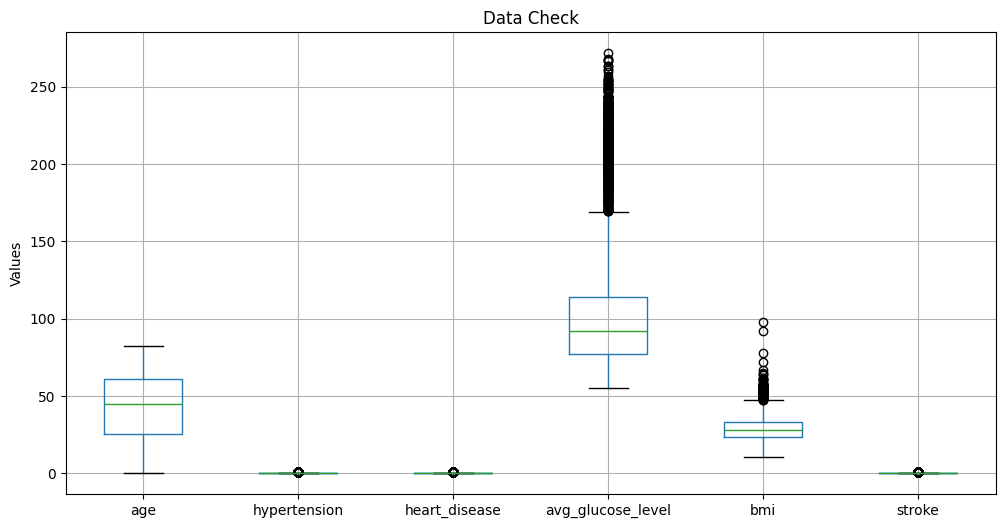

In [5]:
# we going to find our data outliers using boxplot
numeric_columns = df.select_dtypes(include='number').drop(columns=['id'])

plt.figure(figsize=(12, 6)) 
numeric_columns.boxplot()

plt.title("Data Check")
plt.ylabel("Values")
plt.show()


###### We performed boxplot to find data outlier and we did quick search for avg, highest glucose level and bmi.

- avg glucose in our world is between 70 to 100 and it can be high and reach 600+
- avg bmi in our world is between 18.5 and 24.9 and it can be high and reach 186 in some occasions.

<b> Conclusion: </b> we cannot perform any action to drop them.

##### Key Issues we need to fix before proceeding

1- The Age Datatype is Float and we need to convert it to int. <br>
2- The Age have a minimum data which is 0.08 we need to drop any age that under 1<br>
3- Filling Bmi missing values

### Data Cleaning

In [10]:
def missing_values_handler(df):
    imputer = SimpleImputer(strategy='mean')
    Na_column = df.columns[df.isna().any()].tolist()  # Get columns with missing values
    
    # Iterate over each column with missing values
    for column in Na_column:
        df[column] = imputer.fit_transform(df[[column]])
        print(f"Missing values handled using mean imputation for '{column}' column.")
    
    return df
missing_values_handler(df)

Missing values handled using mean imputation for 'bmi' column.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [11]:
#drop any age that under 1
df = df[df["age"] >= 1]

In [12]:
#Change datatype from float to int
df["age"] = df["age"].astype(int)

C:\Users\Az\AppData\Local\Temp\ipykernel_11140\2666104936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df["age"].astype(int)


### EDA & Trend Analysis

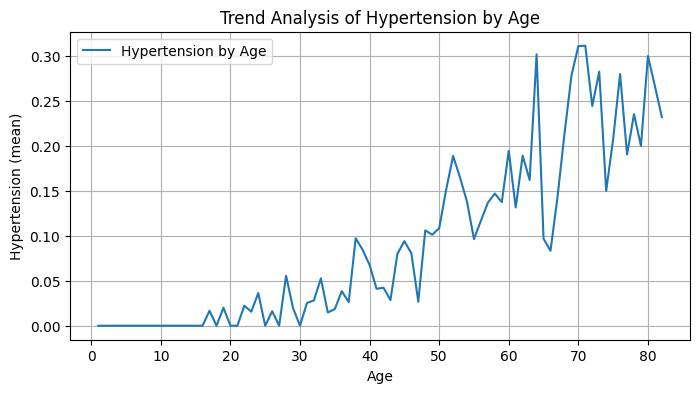

In [13]:
#Trend Analysis between Age and Hypertension
age_hypertension = df.groupby('age')['hypertension'].mean()
plt.figure(figsize=(8, 4))
plt.plot(age_hypertension.index, age_hypertension, label="Hypertension by Age")
plt.xlabel("Age")
plt.ylabel("Hypertension (mean)")
plt.title("Trend Analysis of Hypertension by Age")
plt.legend()
plt.grid(True)
plt.show()



<b>Insight:</b> Hypertension is more common in older adults, suggesting an increased risk as people age. This trend may be due to age-related changes in lifestyle, diet, and physiology. This insight highlights the importance of preventive healthcare and lifestyle changes for older individuals to effectively manage blood pressure.

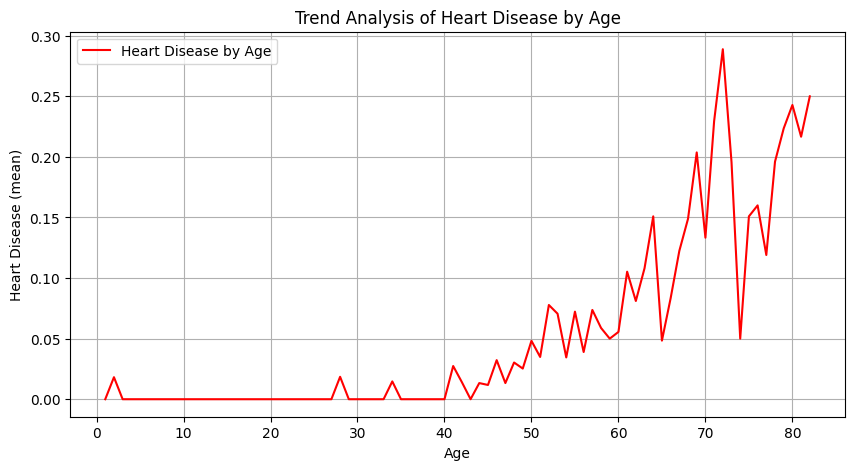

In [14]:
#Trend Analysis between Age and Heart Disease
age_heart_disease = df.groupby('age')['heart_disease'].mean()
plt.figure(figsize=(10, 5))
plt.plot(age_heart_disease.index, age_heart_disease, label="Heart Disease by Age", color='red')
plt.xlabel("Age")
plt.ylabel("Heart Disease (mean)")
plt.title("Trend Analysis of Heart Disease by Age")
plt.legend()
plt.grid(True)
plt.show()

<b>Insight:</b> Heart disease, similar to hypertension, becomes more common as people age. This aligns with medical understanding that age is a major risk factor for cardiovascular diseases. This emphasizes the importance of regular screenings and heart health monitoring as people age, as well as focused interventions for older individuals to reduce the risk of heart disease.

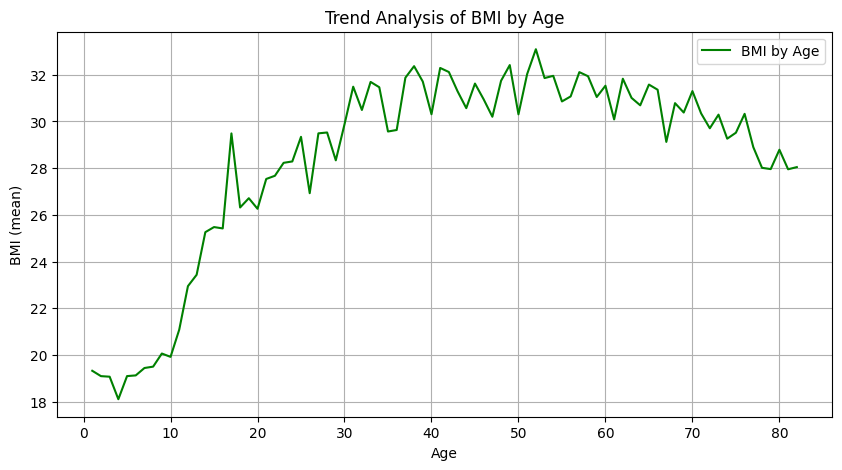

In [15]:
#Trend Analysis between Age and BMI
age_bmi = df.groupby('age')['bmi'].mean()
plt.figure(figsize=(10, 5))
plt.plot(age_bmi.index, age_bmi, label="BMI by Age", color='green')
plt.xlabel("Age")
plt.ylabel("BMI (mean)")
plt.title("Trend Analysis of BMI by Age")
plt.legend()
plt.grid(True)
plt.show()


<b>Insight:</b> BMI can either go up steadily as we age, or it can stay the same after a certain age. Usually, BMI goes up as people gain weight when they are younger and middle-aged. Then it can stay the same or go down a little when they are older, because they lose muscle. If BMI keeps going up, it might mean people aren't eating healthy or exercising enough as they get older. People need to be aware of this and make healthy choices about food and exercise so they can manage their BMI at any age.

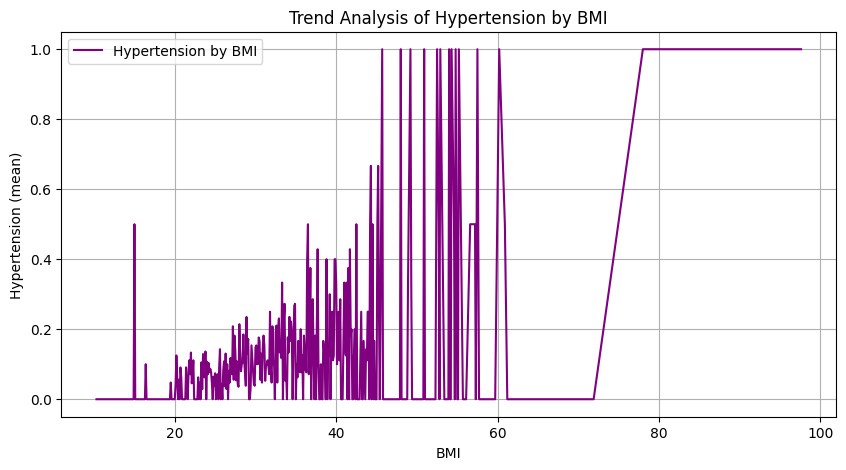

In [16]:
#Trend Analysis between BMI and Hypertension
bmi_hypertension = df.groupby('bmi')['hypertension'].mean()
plt.figure(figsize=(10, 5))
plt.plot(bmi_hypertension.index, bmi_hypertension, label="Hypertension by BMI", color='purple')
plt.xlabel("BMI")
plt.ylabel("Hypertension (mean)")
plt.title("Trend Analysis of Hypertension by BMI")
plt.legend()
plt.grid(True)
plt.show()

<b>Insight:</b> Higher BMI is often linked to a higher risk of hypertension. This means people with higher BMIs are more likely to have elevated blood pressure. This connection highlights the importance of weight management for reducing hypertension risk.

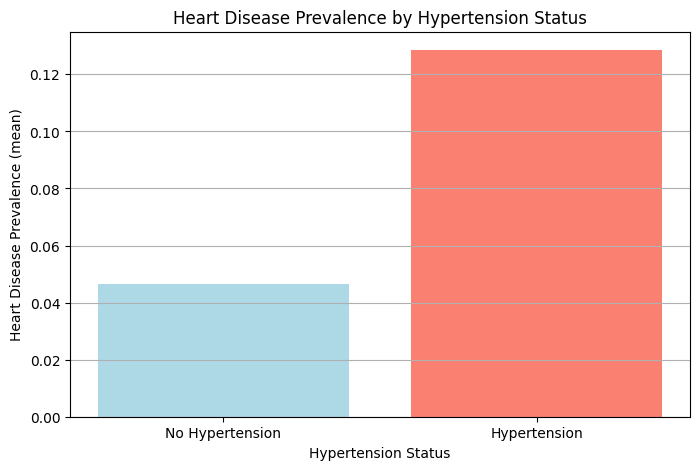

In [17]:
#Trend Analysis between Heart Disease and Hypertension
heart_disease_from_hypertension = df.groupby('hypertension')['heart_disease'].mean()


plt.figure(figsize=(8, 5))
plt.bar(heart_disease_from_hypertension.index, heart_disease_from_hypertension, color=['lightblue', 'salmon'])
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])
plt.xlabel("Hypertension Status")
plt.ylabel("Heart Disease Prevalence (mean)")
plt.title("Heart Disease Prevalence by Hypertension Status")
plt.grid(axis='y')
plt.show()

<b>Insight:</b> The bar plot shows that people with hypertension are more likely to have heart disease than those without it. This suggests a strong link between hypertension and heart disease.

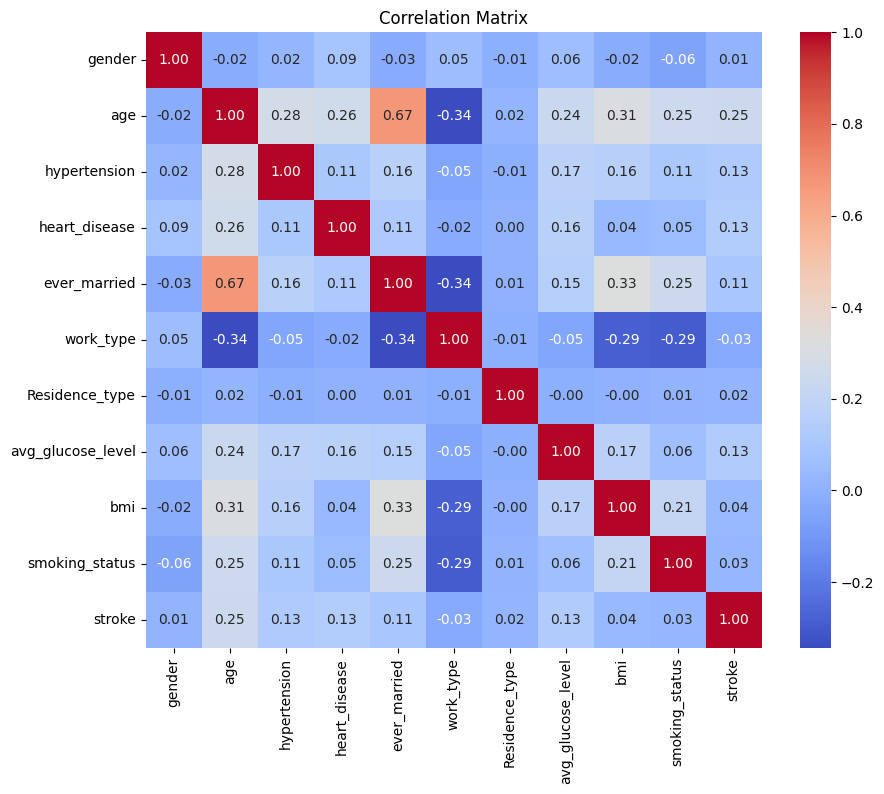

In [24]:
# We Will do Colleration matrix to see the collerations


correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#####  Colleration matrix Inclusion


## Modeling

In [26]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51,0,0,1,2,0,166.29,25.600000,1,0


In [25]:
# We will drop irrelevant columns (id)
df = df.drop(columns=['id'])

KeyError: "['id'] not found in axis"

In [ ]:
# We will encode categorical columns and separate features and target variable
encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = encoder.fit_transform(df[column])

X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Start the Model and showing resaults 
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


- An accuracy of 95% means the model predicts stroke risk accurately in 95 out of 100 cases.
- High Risk: People with certain health conditions, like high blood pressure or heart disease, are at higher risk of having a stroke.
- Low Risk: People without these conditions are at lower risk of having a stroke.
- The model identifies key factors that increase the risk of stroke, such as age, high blood pressure, heart disease, and body mass index (BMI). This means individuals who are older, have high blood pressure or heart disease, or are overweight or obese are more likely to be identified as high-risk by the model.

## Questions 



#### <b>Question 1:</b> How can healthcare providers create programs to help people at high risk?<br>

Using the trend analysis showing the increase in hypertension and heart disease prevalence with age, healthcare providers can identify specific age groups at higher risk. They could then create targeted programs for early screening, lifestyle intervention, and treatment tailored to older adults or those with high BMI.



#### <b>Question 2</b>: How does BMI affect the risk of high blood pressure, and how can weight management programs help save money on healthcare? <br>
The trend analysis between BMI and hypertension shows that higher BMI is associated with an increased likelihood of hypertension. Health insurers and healthcare providers could use this information to promote weight management programs, potentially offering incentives for individuals to achieve healthier BMI ranges.


#### <b>Question 3:</b> How can health insurance companies use these insights to better price insurance premiums?

Insurance companies could use the relationship between hypertension and heart disease to assess health risks more accurately. By analyzing clients' age, BMI, and hypertension status, insurers can set premiums that reflect the increased risk of heart disease and related healthcare costs for certain demographics. Problem Statement

